In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [ ]:
"""
Распределения:

    ξ ~ N(a, σₓ²)
    η ~ N(b, σᵧ²)

Дисперсии:
    σₓ² = 2
    σᵧ² = 1

Выборки:
    x = { -1.11, -6.10,  2.42 }
    y = { -2.29, -2.91 }

Гипотезы:
    H₀: a = b     (мат. ожидания равны)
    H₁: a > b     (среднее ξ больше среднего η)

Уровень значимости:
    α = 0.05
"""

In [2]:
# Исходные параметры
alpha_level = 0.05
sample_size_x = 3
sample_size_y = 2

# Выборки
group_x = np.array([-1.11, -6.10, 2.42])
group_y = np.array([-2.29, -2.91])

# Известные дисперсии
var_x = 2
var_y = 1

In [ ]:
"""
Если H₀ верна, то статистика:

    Z = (x̄ - ȳ) / √(σₓ² / n + σᵧ² / m)

имеет стандартное нормальное распределение:

    Z ~ N(0, 1)

А p-value при правосторонней альтернативной гипотезе H₁: a > b считается по формуле:

    p_value = ∫[Z, +∞] (1 / √(2π)) * exp(-x² / 2) dx

что эквивалентно:

    p_value = 1 - Φ(Z)

где Φ(Z) — функция распределения стандартного нормального закона.
"""


In [3]:
# Расчёт Z-статистики
mean_x = group_x.mean()
mean_y = group_y.mean()
std_err = math.sqrt(var_x / sample_size_x + var_y / sample_size_y)
z_score = (mean_x - mean_y) / std_err

print(f"Z-значение: {z_score:.4f}")

Z-значение: 0.9289


In [4]:
# Вычисление p-value
p_val = norm.sf(z_score)
print(f"P-value: {p_val:.4f}")

P-value: 0.1765


In [ ]:
'''
Для правостороннего теста
p_value > alpha => H₀ не отвергается
'''


# $$W = 1 - \Phi\Bigg(u_{1 - \alpha} - \frac{\Delta}{\sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m}}}\Bigg)$$
# $$u_{1 - \alpha}, \Phi\ для\ N(0, 1),\ \Delta = a - b$$

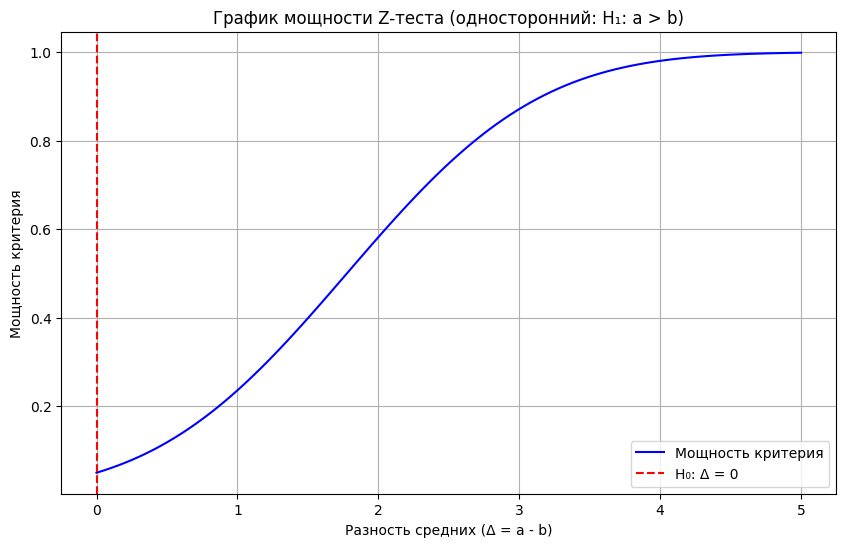

In [5]:
# График мощности критерия
delta_range = np.linspace(0, 5, 100)  # Разности математических ожиданий (Δ = a - b)
test_power = 1 - norm.cdf(norm.ppf(1 - alpha_level) - delta_range / std_err)

plt.figure(figsize=(10, 6))
plt.plot(delta_range, test_power, label="Мощность критерия", color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="H₀: Δ = 0")
plt.xlabel("Разность средних (Δ = a - b)")
plt.ylabel("Мощность критерия")
plt.title("График мощности Z-теста (односторонний: H₁: a > b)")
plt.legend()
plt.grid(True)
plt.show()